In [109]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.1


In [202]:
column_names=["number","year","average_temperature","the_highest_temperature","minimum_temperature","Total_steel_quantity","average_wind_speed","maximum_wind_speed","maximum_instantaneous_wind_speed","mean_relative_humidity","Total_daily_work_hour","average_ground_temperature","gross_output_volume"]
xy = pd.read_csv("C:/Users/rlatj/csvjson.csv", names=column_names,
                na_values = "?", comment='\t',
                sep = ",", skipinitialspace=True)
dataset = xy.copy()
xy.shape
dataset


,number,year,average_temperature,the_highest_temperature,minimum_temperature,Total_steel_quantity,average_wind_speed,maximum_wind_speed,maximum_instantaneous_wind_speed,mean_relative_humidity,Total_daily_work_hour,average_ground_temperature,gross_output_volume
0,2000,2000,13.5,34.3,-8.8,1511.0,2.4,17.9,29.0,64,1869.3,14.7,3.9712
1,2001,2001,13.8,35.0,-12.5,1129.9,2.4,12.2,20.8,63,1910.3,15.5,4.4200
2,2002,2002,13.9,35.3,-7.5,1458.7,2.2,15.2,24.8,66,1705.3,15.1,3.8438
3,2003,2003,13.6,31.9,-10.3,1994.1,1.9,13.7,24.0,70,1750.3,15.0,3.4213
4,2004,2004,14.3,35.2,-11.7,1742.3,1.9,13.0,21.2,66,2147.0,16.3,3.7979
5,2005,2005,13.6,35.8,-11.1,1289.6,1.9,11.7,20.8,68,2082.1,15.7,3.4441
6,2006,2006,14.2,35.0,-11.0,1520.2,1.8,12.0,28.8,68,1948.4,15.6,3.2239
7,2007,2007,14.6,34.3,-4.9,1620.6,1.8,11.2,20.0,68,1862.0,15.7,2.9505
8,2008,2008,14.6,35.1,-8.9,1007.2,2.0,11.1,18.0,65,2020.3,16.2,3.1195
9,2009,2009,14.6,34.5,-10.0,1488.2,2.1,14.2,23.3,66,2069.2,16.5,3.1891


In [203]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

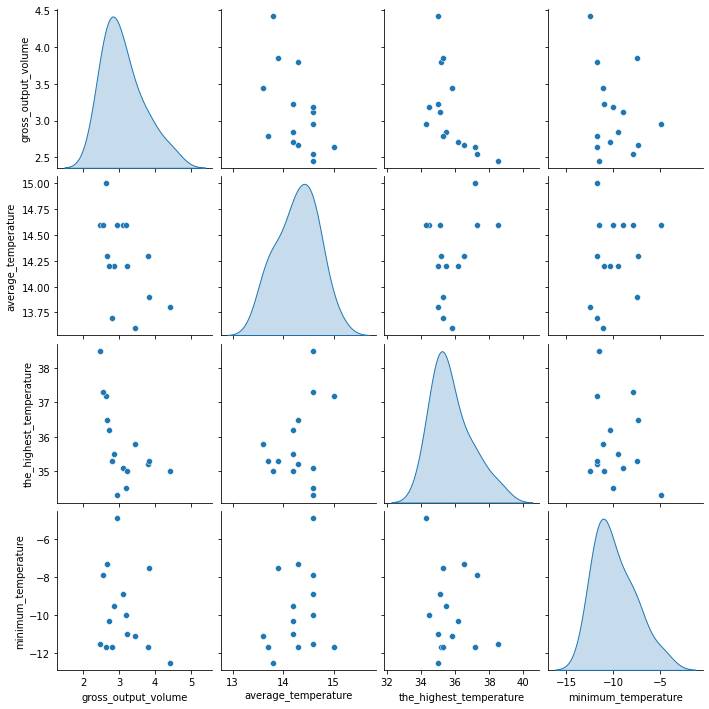

In [204]:
sns.pairplot(train_dataset[["gross_output_volume","average_temperature","the_highest_temperature","minimum_temperature"]],diag_kind="kde")

In [205]:
train_stats = train_dataset.describe()
train_stats.pop("gross_output_volume")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
number,15.0,2009.400000,5.382511,2001.0,2005.50,2009.0,2013.50,2018.0
year,15.0,2009.400000,5.382511,2001.0,2005.50,2009.0,2013.50,2018.0
average_temperature,15.0,14.280000,0.398569,13.6,14.05,14.3,14.60,15.0
the_highest_temperature,15.0,35.780000,1.158940,34.3,35.05,35.3,36.35,38.5
minimum_temperature,15.0,-9.833333,2.145982,-12.5,-11.60,-10.3,-8.40,-4.9
Total_steel_quantity,15.0,1367.506667,225.710559,936.6,1267.50,1427.9,1504.20,1742.3
average_wind_speed,15.0,1.946667,0.241622,1.6,1.80,1.9,2.10,2.4
maximum_wind_speed,15.0,12.053333,1.572017,9.4,11.15,12.0,12.70,15.2
maximum_instantaneous_wind_speed,15.0,21.026667,2.968758,17.3,19.30,20.5,22.00,28.8
mean_relative_humidity,15.0,67.400000,2.414243,63.0,66.00,68.0,69.00,72.0


In [206]:
train_labels = train_dataset.pop('gross_output_volume')
test_labels = test_dataset.pop('gross_output_volume')

In [207]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [208]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [209]:
model = build_model()

In [210]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 64)                832       
_________________________________________________________________
dense_64 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [211]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.12448385],
       [ 0.47799027],
       [ 0.03853214],
       [-0.8967681 ],
       [-0.0115701 ],
       [-0.7351688 ],
       [ 0.23106621],
       [ 0.42536315],
       [ 0.51083213],
       [ 0.2442355 ]], dtype=float32)

In [241]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [242]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.003557,0.058651,0.003557,0.029643,0.165546,0.029643,995
996,0.003304,0.056008,0.003304,0.033846,0.130540,0.033846,996
997,0.003494,0.056701,0.003494,0.028674,0.162059,0.028674,997
998,0.003548,0.055928,0.003548,0.034497,0.132766,0.034497,998
999,0.003922,0.057665,0.003922,0.028168,0.160165,0.028168,999


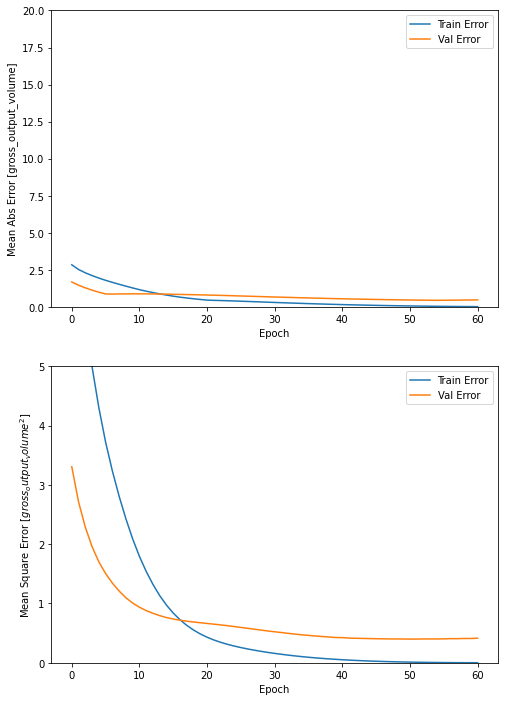

In [248]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [gross_output_volume]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$gross_output_volume^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  plt.show()

plot_history(history)


.............................................................

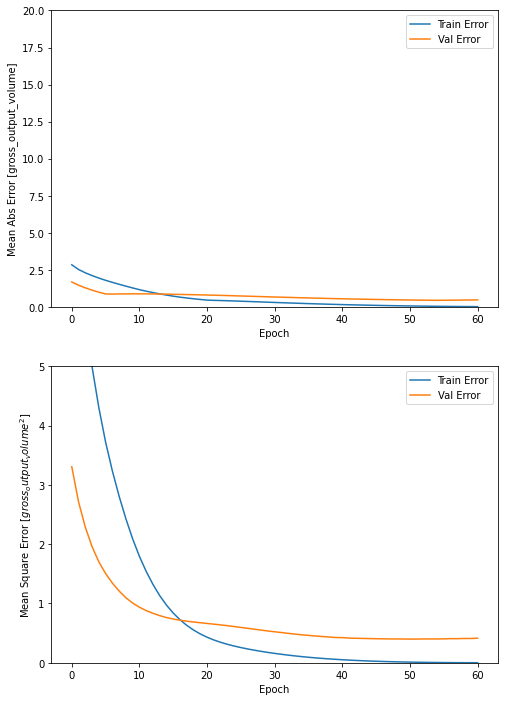

In [244]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.1, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [245]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} gross_output_volume".format(mae))

1/1 - 0s - loss: 4.7715 - mae: 1.6699 - mse: 4.7715
테스트 세트의 평균 절대 오차:  1.67 gross_output_volume


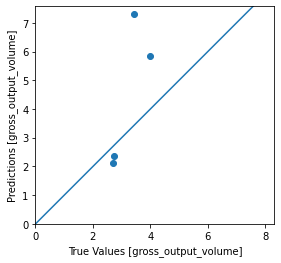

In [246]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [gross_output_volume]')
plt.ylabel('Predictions [gross_output_volume]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

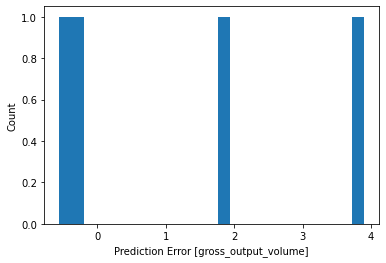

In [247]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [gross_output_volume]")
_ = plt.ylabel("Count")